<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Importing Libraries
    
</h2>
</div>
    
</center>

In [1]:
#Installing yfinance library
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.8 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: royalblue;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white;">Reading the data from yfinance library
    
</h2>
</div>
    
</center>

Yahoo Finance uses `pandas` library and automatically puts the entire data into a nice looking dataframe. We are using the `max` period to fetch all of the data of **Google** Stock prices.

In [3]:
# This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
data = yf.Ticker("GOOGL")
#create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
data_hist = data.history(period="max")
# prints the data_hist variable
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,97.949997,100.040001,97.500000,99.790001,40005100,0.0,0.0
2023-01-24 00:00:00-05:00,98.099998,99.610001,97.199997,97.699997,33078500,0.0,0.0
2023-01-25 00:00:00-05:00,95.570000,96.160004,93.760002,95.220001,42330000,0.0,0.0


In [4]:
data_hist = data_hist.drop(data_hist.index[4640:], axis=0)

In [5]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 4640 rows and 7 columns


The below chart shows us how the prices have fluctuated over the months, years, and trading days.

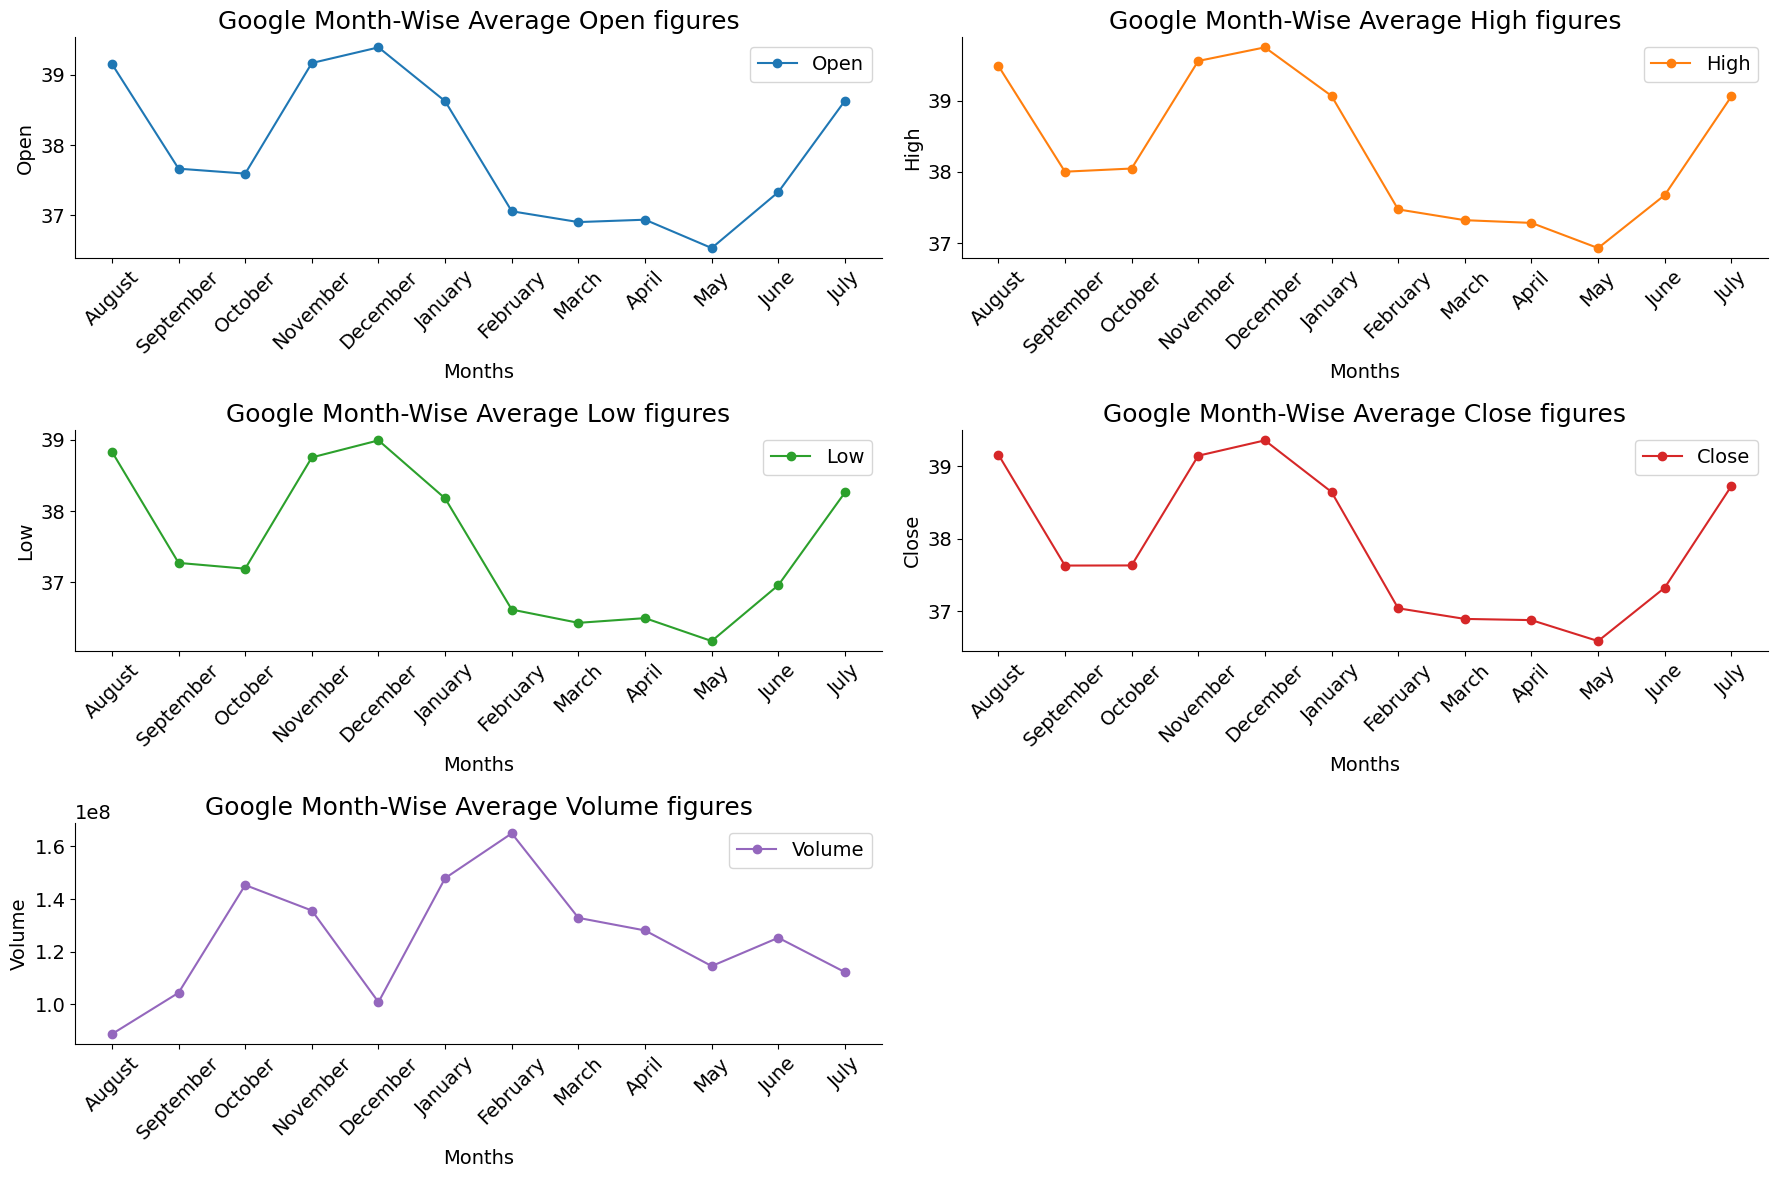

In [6]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

#Set the figure size of the plot
fig = plt.figure(figsize=(18,12))

#Loop through the each column in the dataframe to generate a subplot
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    #Generate a subplot with the given dimensions
    plt.subplot(a, b, c)
    #Plot the data in a line graph, with different colors for each line
    plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    #Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    #Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
    #Increment the subplot counter
    c = c + 1

#Adjust the layout of the plot
plt.tight_layout()
#Show the plot
plt.show()

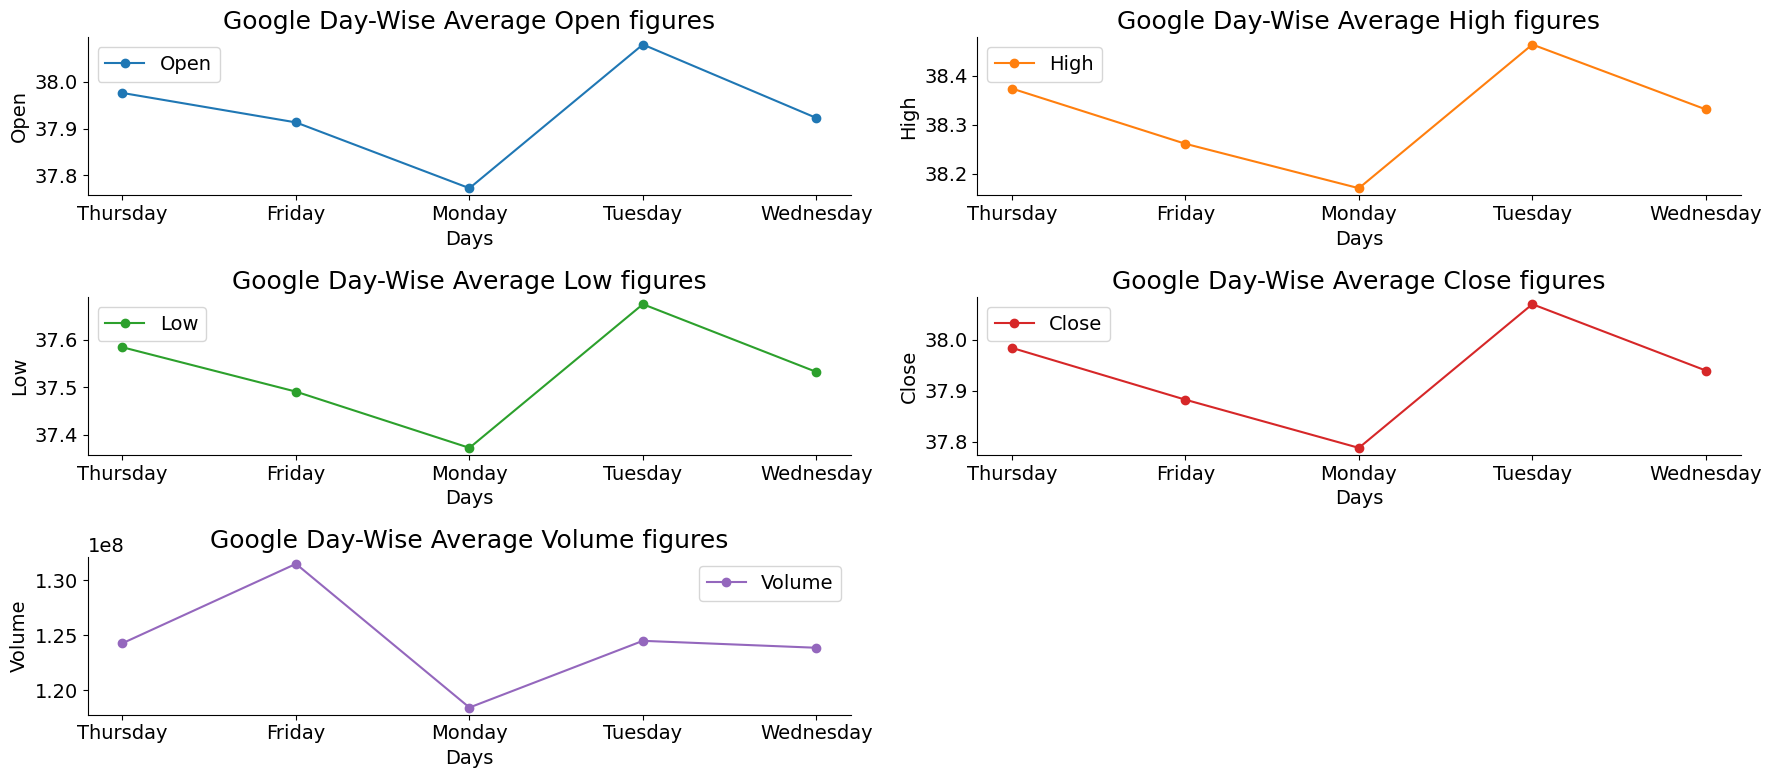

In [7]:
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,8))

for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

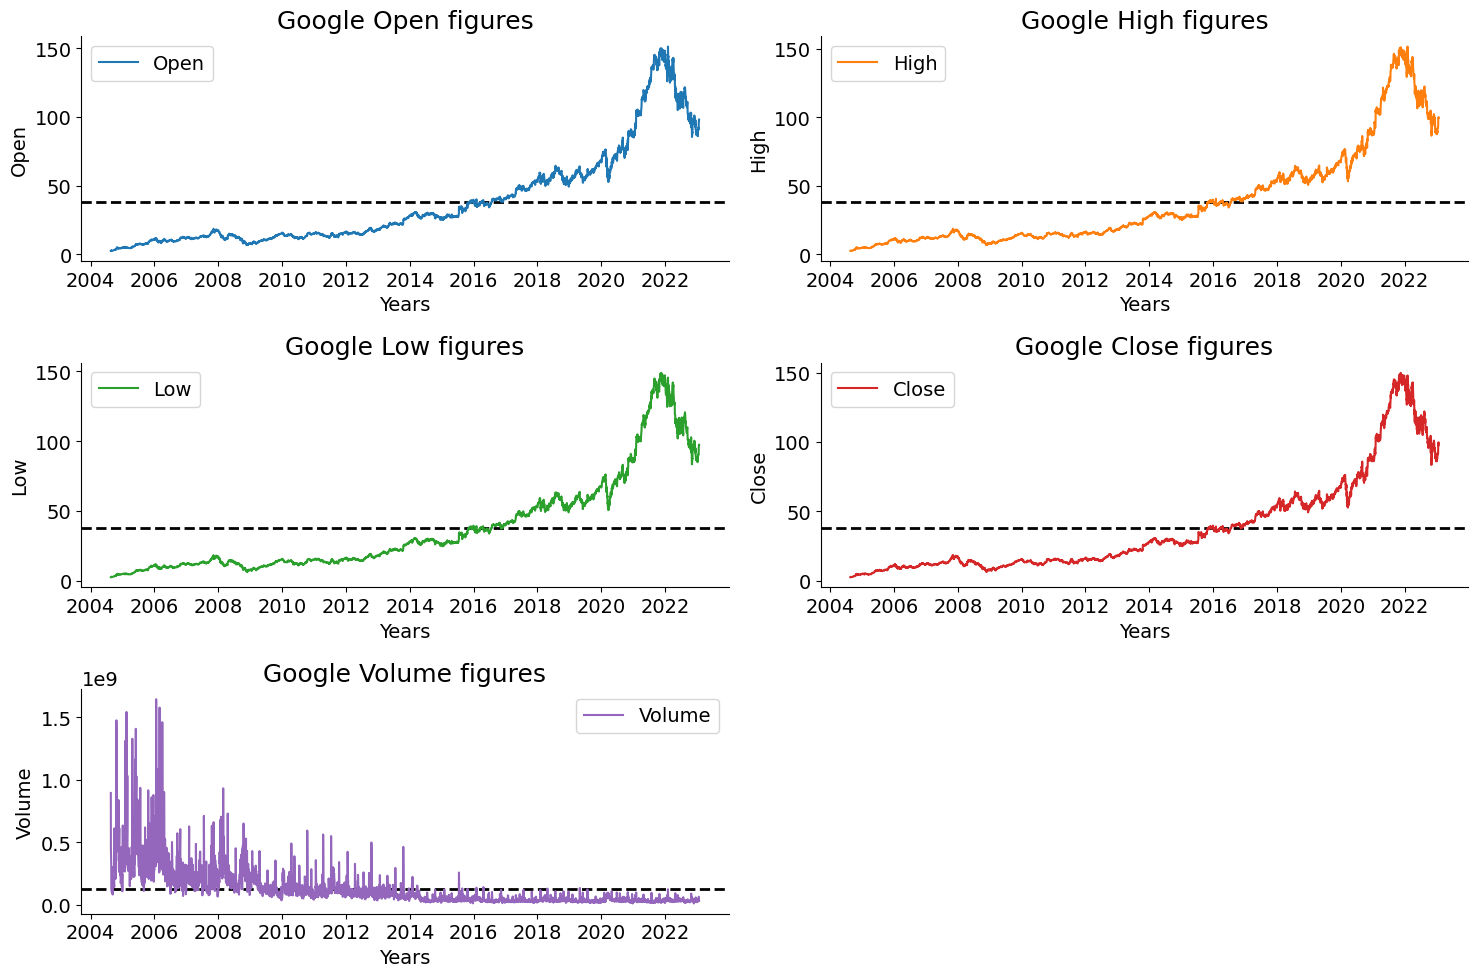

In [8]:
# This code plots open high low and close columns in a dataframe, data_hist.

# The number of rows, columns, and the subplot counter are initialized. 
a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(15,10))

for i in range(len(data_hist.columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(data_hist[data_hist.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(data_hist.columns[i])
    #Adding Legend
    plt.legend([data_hist.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

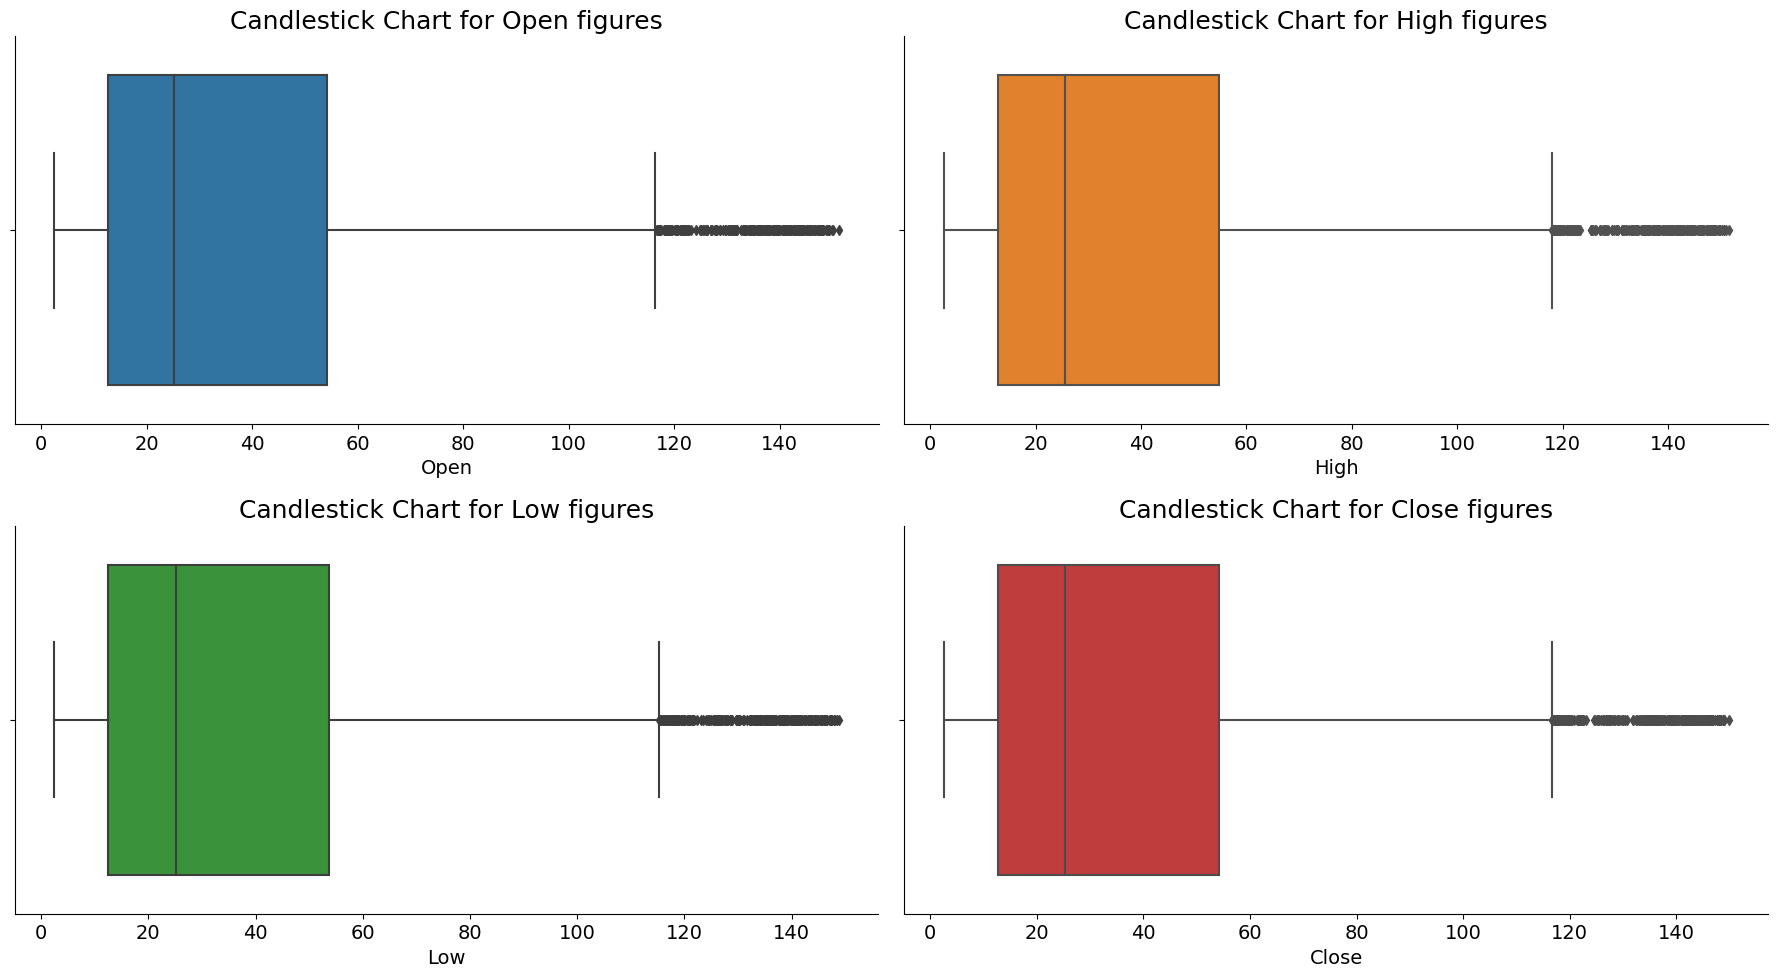

In [9]:
# This code plots boxplots of various columns in a dataframe, data_hist.

colors = plt.rcParams["axes.prop_cycle"]()

# The number of rows, columns, and the subplot counter are initialized. 
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

# A figure is initialized  
fig = plt.figure(figsize=(18,10))

#loop is used to iterate over the columns of dataframe. 
for i in range(len(data_hist.columns[:-3])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #For each column, a boxplot is plotted and labels and titles are set accordingly. 
    sns.boxplot(data_hist[data_hist.columns[i]], color= color )
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #X Axis label is added
    plt.xlabel(data_hist.columns[i])
    #title to the plot is added
    plt.title(f'Candlestick Chart for {data_hist.columns[i]} figures', fontsize=18)
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

In [10]:
def candlestick(t, o, h, l, c):
    """
    # This function takes in five variables, t (time), o (open price), h (high price), 
    l (low price), c (close price) to plot a candlestick chart. 
    """
    
    # Sets the figure size.
    plt.figure(figsize=(22,5))
    # Sets the color based on whether the close price is greater than the open price.
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    # Plots the absolute difference between open and close prices, from the minimum of the two.
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color)
    # Plots the difference between the high and low price, from the low price.
    plt.bar(x=t, height=h-l, bottom=l, color=color)
    # Hides the Plot grid.
    plt.grid(visible=False)
    # Sets the title of the chart.
    plt.title('Candlestick Chart')

In [11]:
# set start and end dates for the plot
today = date.today()
start = '2022-10-31'
end = today

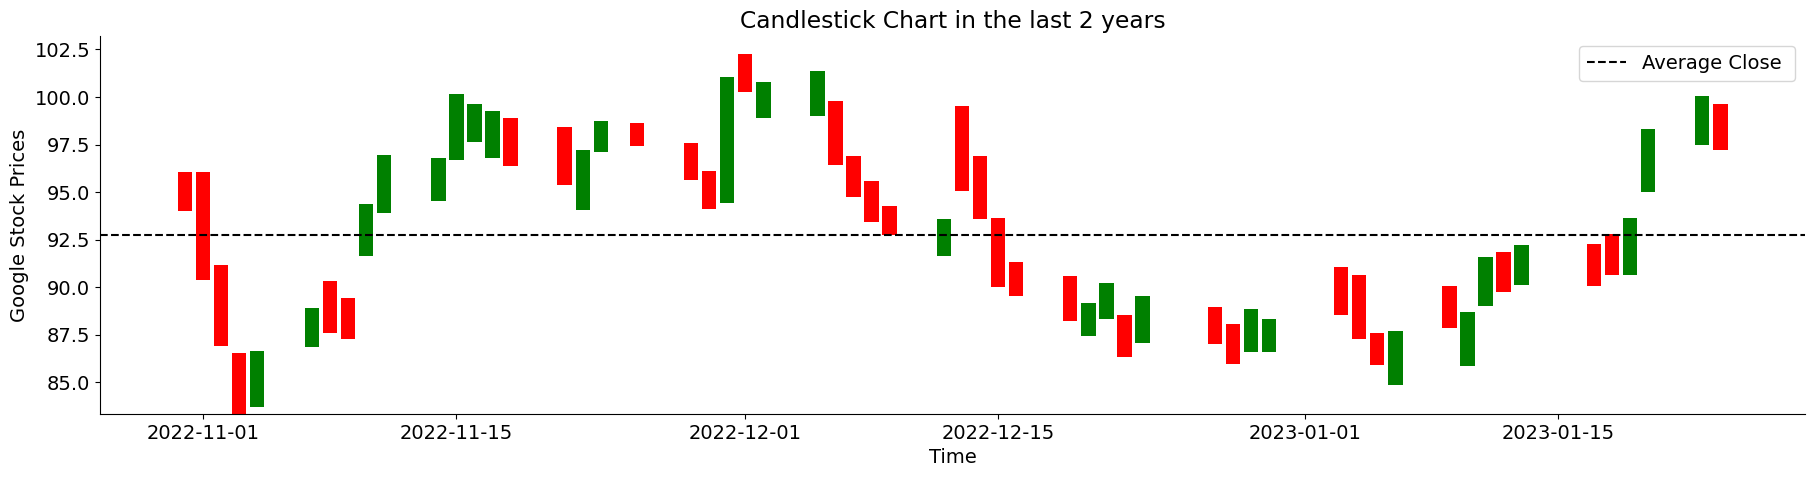

In [12]:
#passing in the index with Open, High, Low And Close Values to the function we created above
candlestick(
    data_hist[start:end].index,
    data_hist[start:end]["Open"],
    data_hist[start:end]["High"],
    data_hist[start:end]["Low"],
    data_hist[start:end]["Close"]
)
plt.axhline(data_hist[start:end]["Close"].mean(), linestyle="--", color='black')
# remove chart spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#adding x axis label
plt.xlabel('Time')
#adding y axis label
plt.ylabel('Google Stock Prices')
#Adding the title to the chart
plt.title('Candlestick Chart in the last 2 years')
#Adding the legend for the average line
plt.legend(['Average Close '])
#showing the plot
plt.show()

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: ;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:black;">Adding Target Values
    
</h2>
</div>
    
</center>

We are adding the target column where the column will say 0 or 1. 0 meaning the price went down and 1 would mean the price went up.

We will be using the rolling method of Pandas library. Rolling method will look at the number of rows in the data (in our case 2) and then what we are saying is return 1st row if the 2nd row is higher else return 0 and this gives us our target.

In [13]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Date
2004-08-19 00:00:00-04:00    NaN
2004-08-20 00:00:00-04:00    1.0
2004-08-23 00:00:00-04:00    1.0
2004-08-24 00:00:00-04:00    0.0
2004-08-25 00:00:00-04:00    1.0
                            ... 
2023-01-18 00:00:00-05:00    0.0
2023-01-19 00:00:00-05:00    1.0
2023-01-20 00:00:00-05:00    1.0
2023-01-23 00:00:00-05:00    1.0
2023-01-24 00:00:00-05:00    0.0
Name: Close, Length: 4640, dtype: float64

In [14]:
# This code adds a new column called "Target" to the data_hist dataframe. 
#The values in the target column are determined by comparing the current value in the "Close" column with the previous value. 
#If the current value is larger than the previous value, the target column value will be set to True. 
#If the current value is smaller than the previous value, the target column value will be set to False.

data_hist["Target"] = data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

Now that we have our target, <i >we would shift our data by 1 row</i>. 

- What that means is data of 19-08-2004 will shift to the next available data which is 20-08-2004. This means we would, in real scenario, be using yesterday's data to predict tomorrow. 

- However if we were not to do that what we would be doing is using today's data to predict today's target which is something that is likely to render terrible results in real life situations.

In [15]:
#Copy the data_hist dataframe and store it in a new dataframe named df
df = data_hist.copy()

#Shift the data in the dataframe by one row
df = df.shift(1)

#Display the first five rows of the shifted df
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-19 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00-04:00,2.502503,2.604104,2.401401,2.511011,893181924.0,0.0,0.0,NaN
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0,0.0,0.0


Originally we had `Open`, `High`, `Low`, `Close`, `Volume`, `Dividends`, `Stock Splits` but we are only using `Open`, `High`, `Low`, `Close`, `Volume`, as our predictors for the model. Later on we would add more predictors that will help our model perform better.

In [16]:
#Create a list of predictors 
predictors = ["Close", "Volume", "Open", "High", "Low"]

#Select the columns in the data for the predictors and the target
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

#Print the first five rows of the data
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-23 00:00:00-04:00,2.527778,2.729730,2.515015,2.710460,456686856.0,1.0
2004-08-24 00:00:00-04:00,2.771522,2.839840,2.728979,2.737738,365122512.0,1.0
2004-08-25 00:00:00-04:00,2.783784,2.792793,2.591842,2.624374,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.626627,2.702703,2.599600,2.652653,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.626376,2.701451,2.619119,2.700450,141897960.0,1.0


<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color: mediumpurple;
           font-size:110%;
           letter-spacing:0.5px">

<h2 style="padding: 10px;
              color:white ;">Prediction Using ARIMA Model
    
</h2>
</div>
    
</center>

## ARMA and ARIMA

- ARMA and ARIMA are models used in time series forecasting. ARMA stands for Autoregressive Moving Average and ARIMA stands for Autoregressive Integrated Moving Average. 

- These models are used to analyze and forecast time series data. Both models analyze the current values of the time series and use past values to forecast future values. 

- ARMA models use linear combinations of past values, while ARIMA models use differencing of past values to remove any trend or seasonality that might be present. 

- ARMA and ARIMA models are usually used together to develop an accurate forecast of future values.

**Auto Regressive Model**

- A Statistical model that tries to predict the values based on lagged values and the lag could be chosen as per the wish.
- For Example: Sales of 9th month could be predicted based on 7th and 8th Month.

**Moving Average Model**

- A statistical Model where the **Error's Moving Average** coupled with the **Average of the Dependent Variable** tries to predict the Target Value

- There are two types of Moving averages as of now:-
    1. **Rolling**
        - We use window size and keep on rolling with the values keeping the window size the same. We essentially exclude the last one and then include the next value when moving to the next value.

    2. **Recursive**
        - We keep on adding values but don't really exclude the others.
        
        
**BOX JENKINS METHODOLOGY**

The Box-Jenkins methodology is a statistical approach used to identify, analyze, and forecast time series data. It is a set of techniques used to identify the underlying components of a time series and to model their behavior. 

The Box-Jenkins methodology was developed by George Box and Gwilym Jenkins in the 1960s and is commonly used in econometrics and engineering. 

It involves three main steps: 
1. model identification, 

2. parameter estimation, and 

3. model checking and diagnostics. 

Box-Jenkins models are typically based on linear combinations of autoregressive (AR) and moving average (MA) terms, with the degree of each term determined by trial-and-error. The models are then fitted to the data, and any discrepancies between the model and the data are used to improve the model.


- This methodology assumes the variable must be stationary

Being stationary in time series forecasting means that a time series has constant statistical properties over time, such as mean, variance, and autocorrelation. This means that a given time series behaves in a predictable and consistent way, making it easier to forecast.

**When to use which model**

When the variable is stationary you may go ahead and use the ARMA model however if the variable is not stationary, one must use ARIMA model which is represented as ARIMA (p,d,q) where p is the order of lagged values of the variable, d is the order of difference the variable becomes stationary at and q is the order of lagged values of the error.

**How to find the values of p and q in ARMA or ARIMA**

The values of p and q in an ARMA or ARIMA model are determined by examining the autocorrelation and partial autocorrelation functions (ACF and PACF) of the time series. 

- The value of p is the number of autoregressive terms (AR terms) in the model, and it is the number of lags in the PACF that are significantly non-zero. 

- The value of q is the number of moving average terms (MA terms) in the model, and it is the number of lags in the ACF that are significantly non-zero.

**Auto Correlation Function**

- It is a statistical method used to measure the correlation between a given time series and a lagged version of itself over successive time intervals. 
- This is used to measure the degree of similarity between a series and lagged versions of itself over different time periods.
- It can be used to detect seasonality and other patterns in a time series. 
- The further lag will include the effect of the previous lags
- Used to calculate the lag in Moving Average (q)

**Partial Autocorrelation Function**

- PACF (Partial Autocorrelation Function) is a tool used in Time Series Analysis to identify the correlations between a time series and lagged versions of itself. 
- It is used to determine the number of autoregressive (AR) terms needed for a given time series, as well as the order of any moving average (MA) terms. (p)
- The further lags will not include the effect of the previous lags

**STEPS TO MAKING FORECASTING IN TIME SERIES**

1. Identification - ARMA or ARIMA
2. Estimation - Finding out which model is the best. Different combinations or AR and MA is used to figure out which model is the best. The criteria to find out the best model is:
    - Significance of Variable (among the AR and MA Combo) should be high
    - Volatility should be minimum
    - Adjusted $r^2$ should be maximum.
    - AIC and SIC should be minimum
3. Diagnostic Test -  Errors should be stationary, if not you go back to the first step an repeat the process until the error becomes stationary.
4. Predictions

In [21]:
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

## Stationarity Check
- Stationarity check is a method of testing whether a time series data is stationary or not. It is done by plotting the data in a graph and checking for any clear trend and seasonality. Stationarity can be determined by looking at the mean, variance, and autocorrelation of the data.

- If a time series is stationary, the mean, variance, and autocorrelation should remain constant over time. If the mean, variance, or autocorrelation change over time, the time series is non-stationary.

In [22]:
for i in df.columns[:4]:
    #Checking the stationarity of the data
    result = ts.adfuller(df[i])

    #Printing the test results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    #Interpreting the test results
    if result[1] <= 0.05:
        print(i,'is stationary')
    else:
        print(i,'is not stationary')
    print('   ')

ADF Statistic: -0.122491
p-value: 0.947152
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Open is not stationary
   
ADF Statistic: -0.042615
p-value: 0.954863
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
High is not stationary
   
ADF Statistic: -0.138291
p-value: 0.945489
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Low is not stationary
   
ADF Statistic: -0.044549
p-value: 0.954689
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Close is not stationary
   


## Seasonal Decomposition of the Series
- Seasonal Decomposition of a series is a statistical process used to remove seasonal patterns from a time series dataset. This process involves breaking down the data into three components: the trend, the seasonal component, and the residuals.

- The trend component is a smooth representation of the series, the seasonal component is the characteristic pattern that repeats over time, and the residuals are the remaining variations in the data that are not explained by the trend and seasonal components.

- Seasonal Decomposition can be done using various techniques, such as moving average, smoothing, and exponential smoothing.

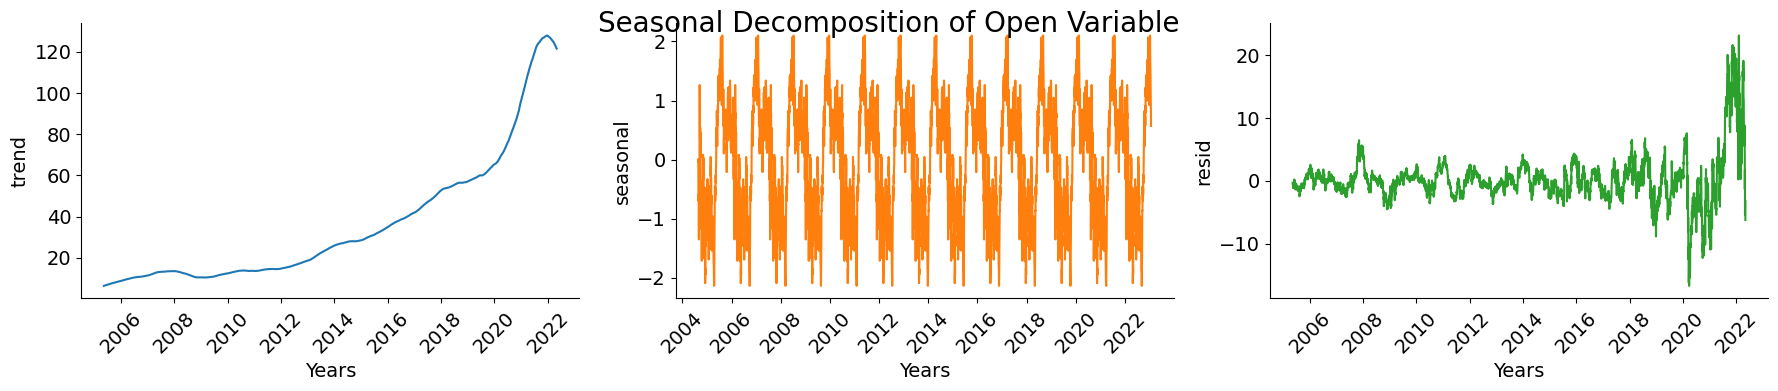

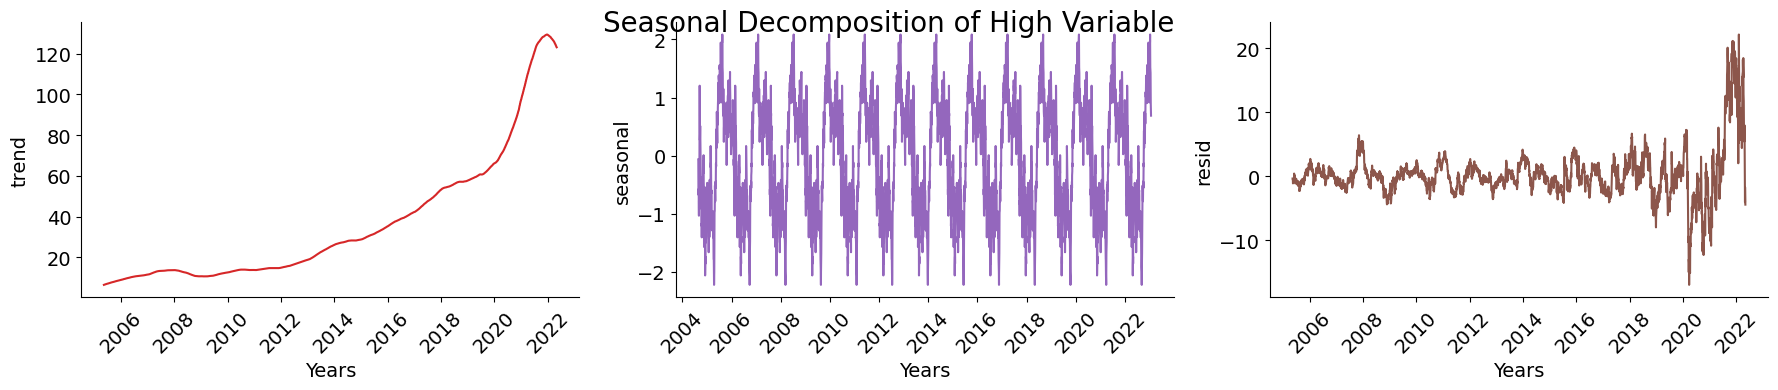

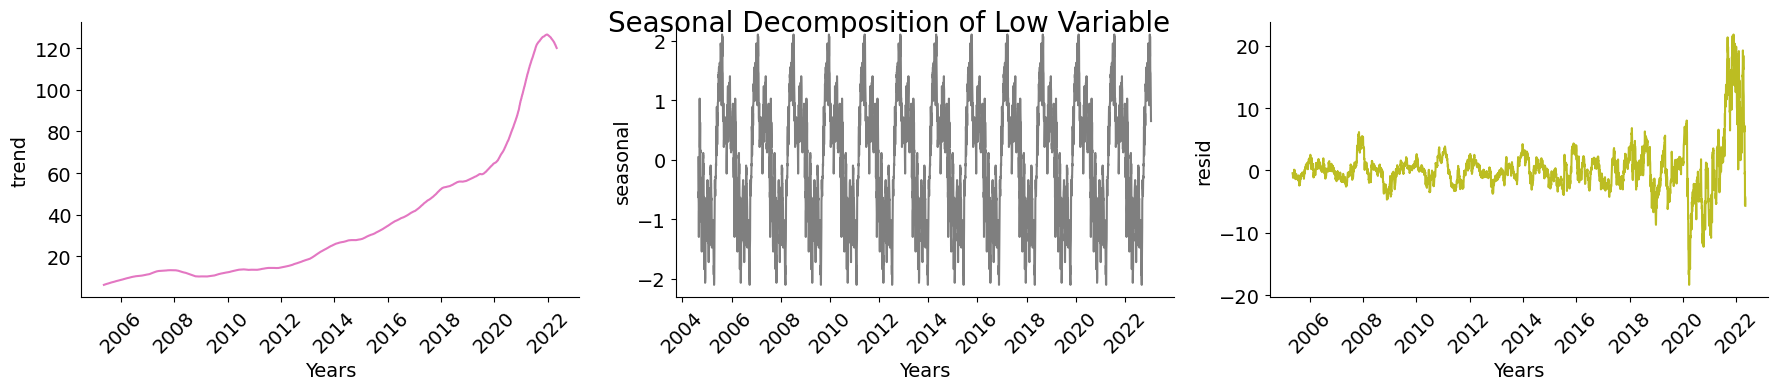

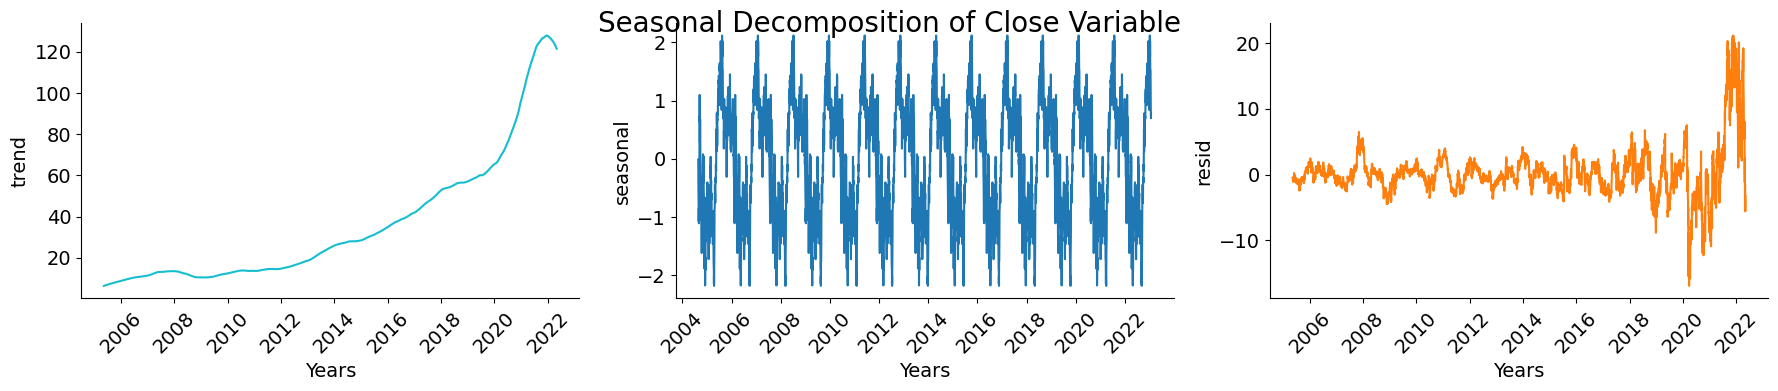

In [23]:
colors = plt.rcParams["axes.prop_cycle"]()
for j in df.columns[:4]:
    results = seasonal_decompose(df[j], period=365)
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c) 
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()    
    plt.show()

## Finding out the orders for p and q


The p and q values in ARIMA are determined using a process called autocorrelation function (ACF) and partial autocorrelation function (PACF). 

- The ACF and PACF help to identify the number of autoregressive (p) and moving average (q) terms needed in the model. 

- Generally, if the ACF shows a sharp cutoff and the lag-1 autocorrelation is positive, you should use an AR model (p). If the PACF shows a sharp cutoff and the lag-1 autocorrelation is negative, you should use an MA model (q). 

- If there is a gradual decline, you should use a combination of both (p and q). Finally, the order of the AR and MA model must be determined by minimizing the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).

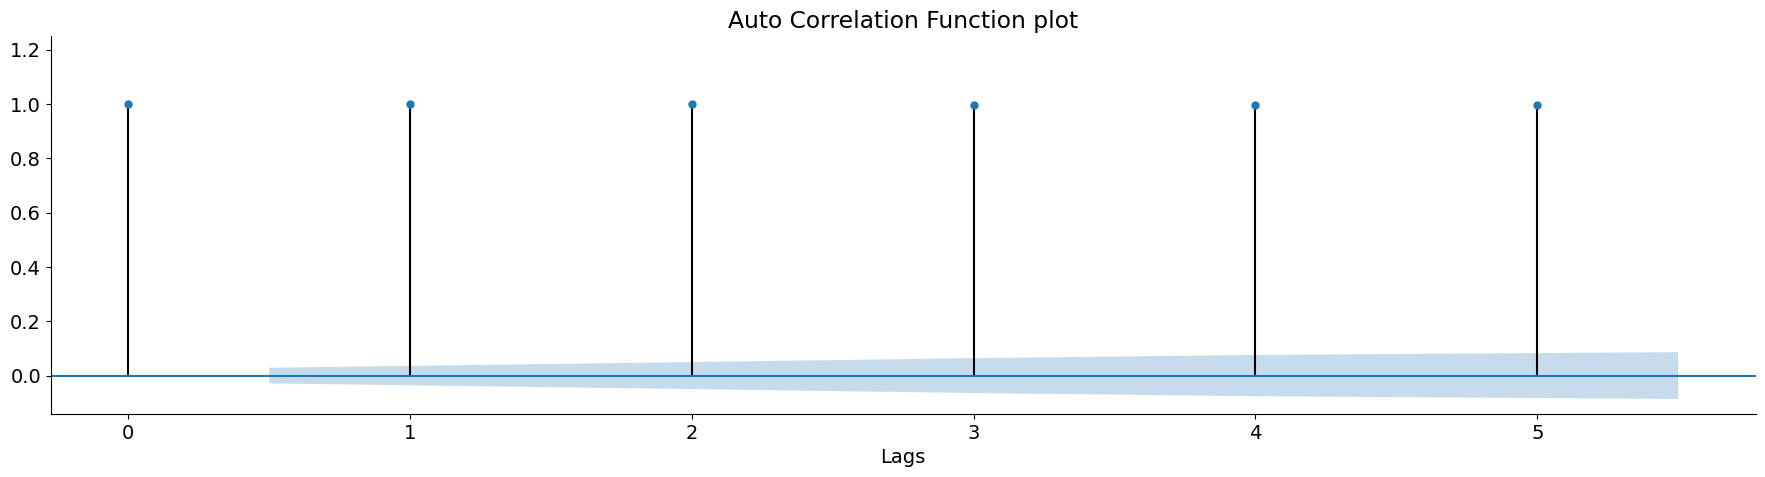

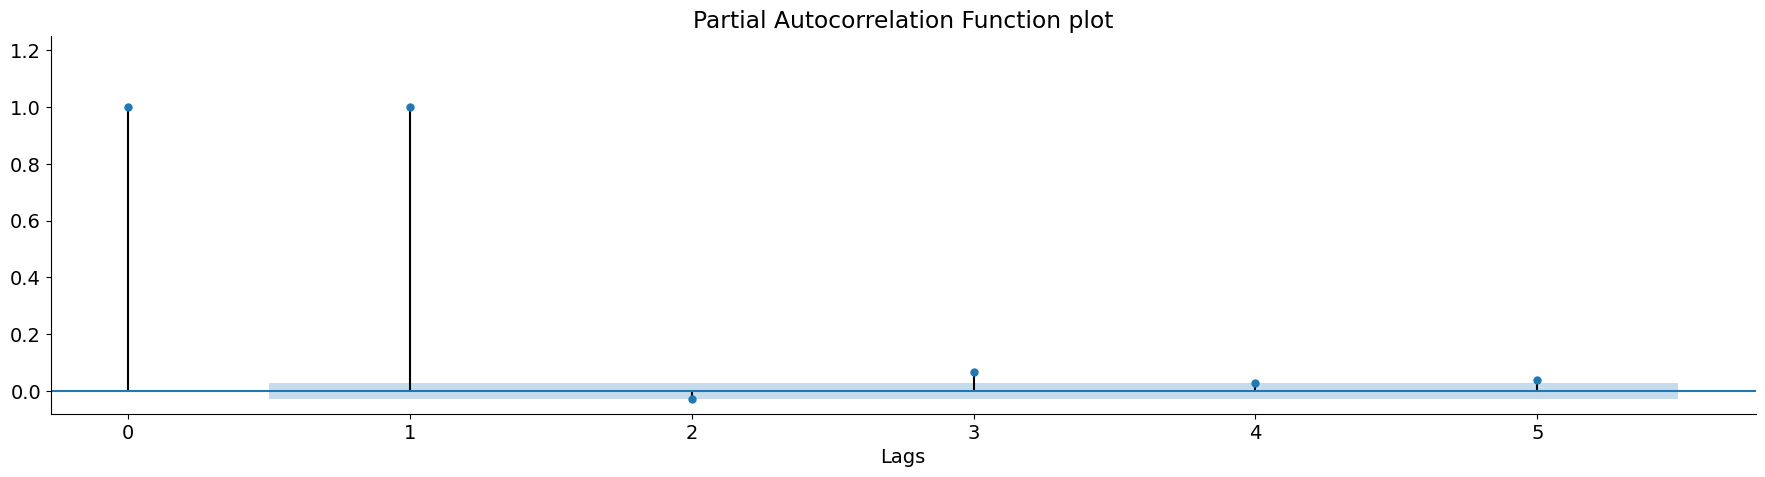

In [24]:
# plot the ACF plot
plot_acf(df.High, lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# plot the PACF plot
plot_pacf(df.High, lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

## For Integrated Order (d)
- Integrated order (I) is a parameter in an ARIMA model that refers to the number of times the data have been differenced in order to make it stationary.

- A value of 0 indicates that the data has not been differenced, while a value of 1 indicates that the data has been differenced once. Higher values indicate that the data has been differenced multiple times.

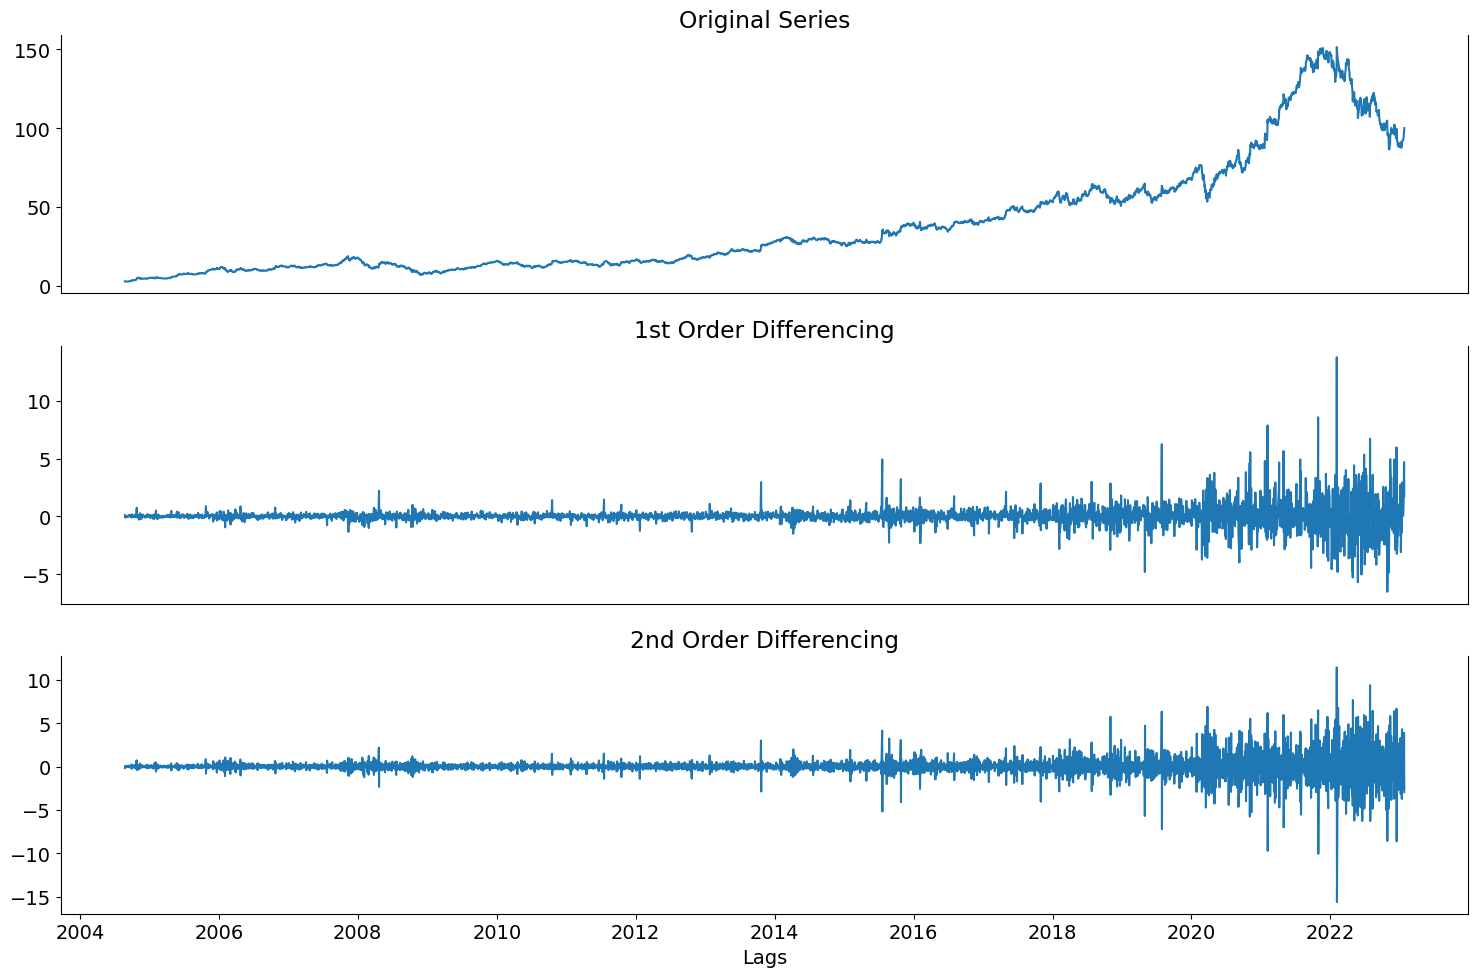

In [25]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(df.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(df.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()

Since the series has become stationary at 1st order differencing, we will take d as 1.

## For MA Order (q)
- A moving average model is a type of time series model that uses historical data to forecast future values. It is a simple and widely used technique that can be used to smooth out short-term fluctuations in data and highlight longer-term trends and cycles.

- The model is based on the idea that the value of a time series at any given point is a function of the average of the values of the previous few points. The number of points used to calculate the average is called the window size.

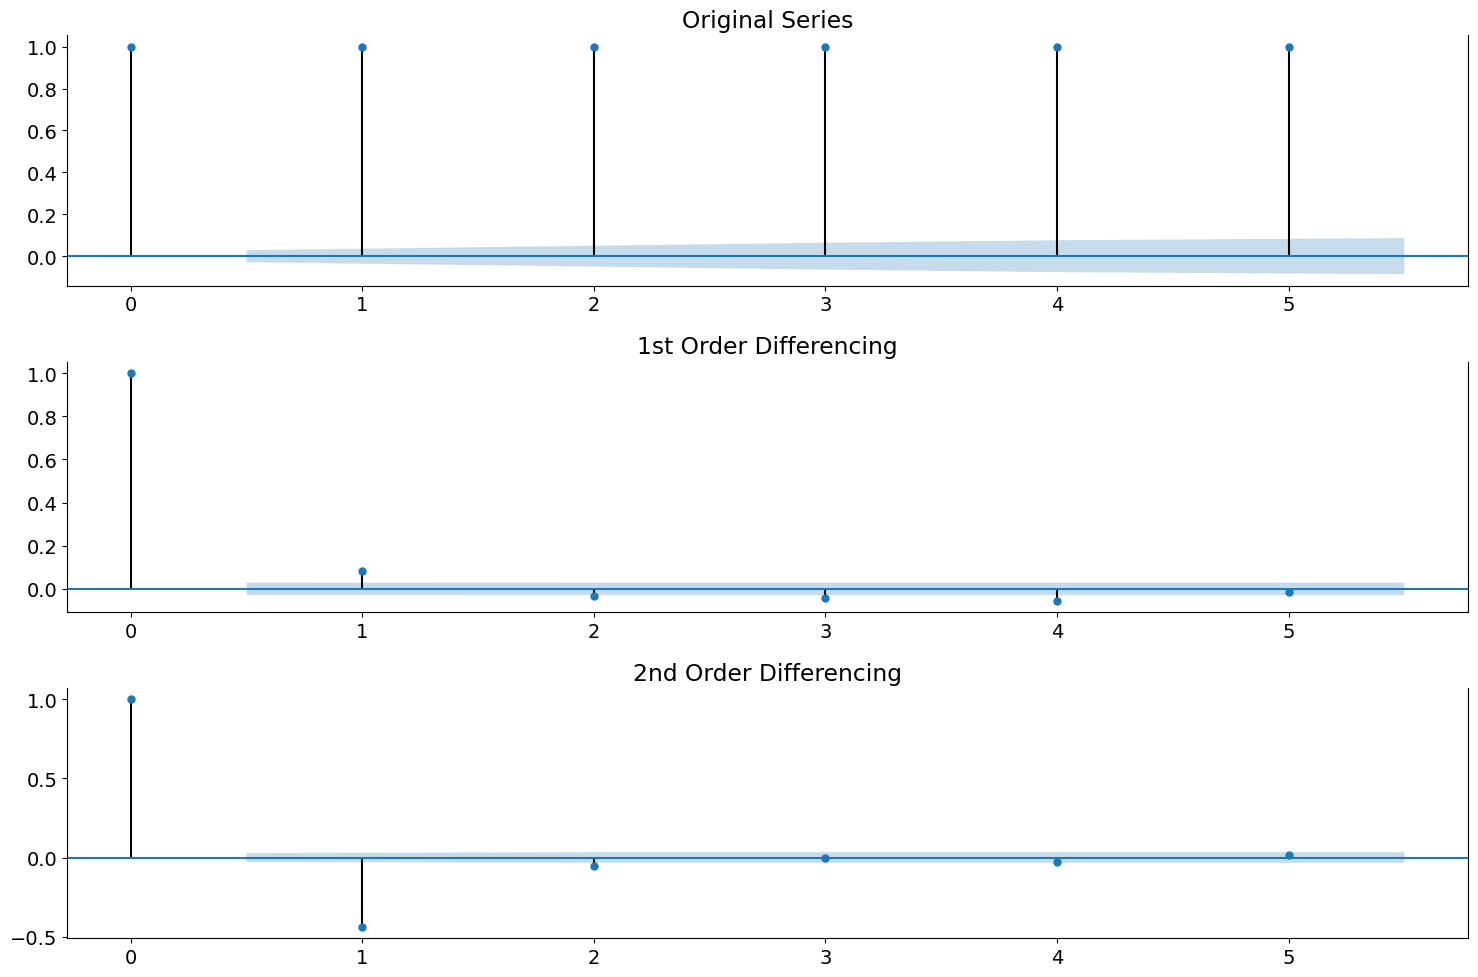

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df.High, ax=ax1, lags = 5,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df.High.diff().dropna(), lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## For AR order (p)
- An autoregressive (AR) model is a type of a statistical model used in time series analysis that uses observations from the past to predict future values.

- It is a type of regression analysis where the output variable (Y) is modeled as a linear function of its own past values and a noise term (epsilon).

- AR models are used to describe and analyze time-dependent phenomena such as stock prices, economic cycles, and ecological phenomena.

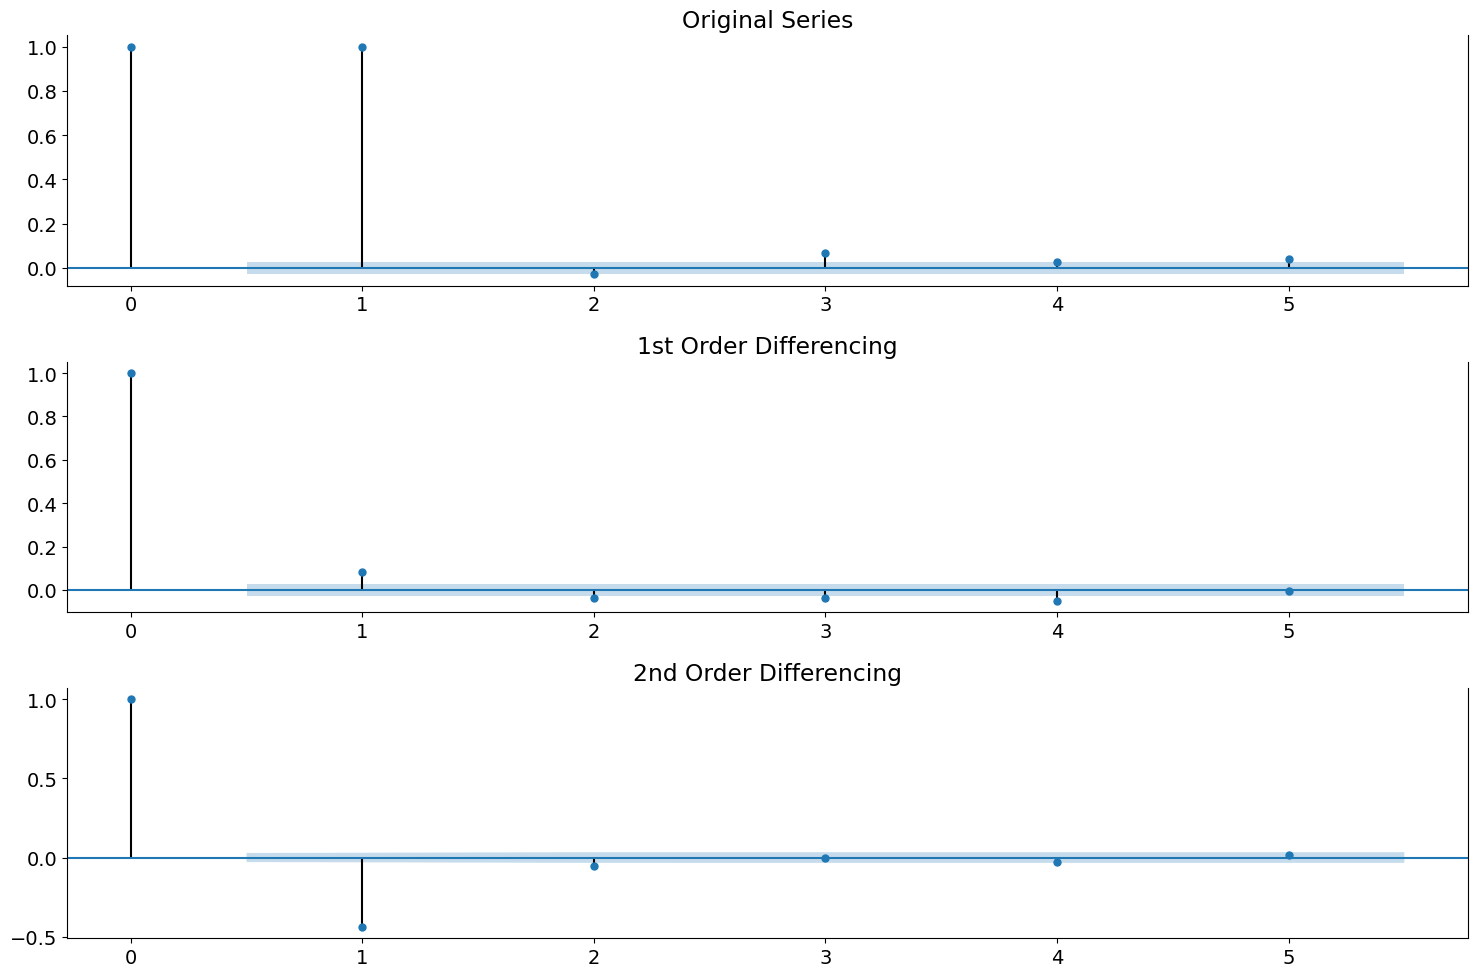

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df.High, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df.High.diff().dropna(),lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


You should stop looking further for p and q values when the ACF and PACF plots show a sharp cut-off or when the correlation values of the lags drop below a certain threshold. 

This usually indicates that the pattern of the data has been captured and adding additional lags would not provide any additional information.

## Why ARIMA is better than ARMA?

We can technically use the ARMA model ARIMA, or AutoRegressive Integrated Moving Average models, are better than ARMA models because 

- they are more flexible and can account for non-stationary data. 
- ARIMA models can use differencing of the data to remove trend and seasonality, which ARMA models cannot do. 
- ARIMA models also allow for the inclusion of a seasonal component in the model, which ARMA models cannot do.

## Splitting the data

Before fitting the model lets split the data. Splitting the data here in Time Series is a bit different from the typical Machine Learning Algorithms dataset splitting. Since there is a sequence and we don’t want the model to learn the empty gaps (because of the random splitting), we will split the data based on the year.

We have picked the data prior to 2020 for training data and the remaining data for the testing purposes

In [28]:
#Copy the data_hist dataframe and store it in a new dataframe named df
df = data_hist.copy()

#Shift the data in the dataframe by one row
df = df.shift(1)

#Display the first five rows of the shifted df
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2023-01-18 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,32602400.0,0.0,0.0,0.0
2023-01-19 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,29116700.0,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003,37000400.0,0.0,0.0,1.0
2023-01-23 00:00:00-05:00,95.099998,98.300003,95.019997,98.019997,63037300.0,0.0,0.0,1.0
2023-01-24 00:00:00-05:00,97.949997,100.040001,97.500000,99.790001,40005100.0,0.0,0.0,1.0


In [29]:
train = df[df.index.year<2022]
test = df[df.index.year>=2022]

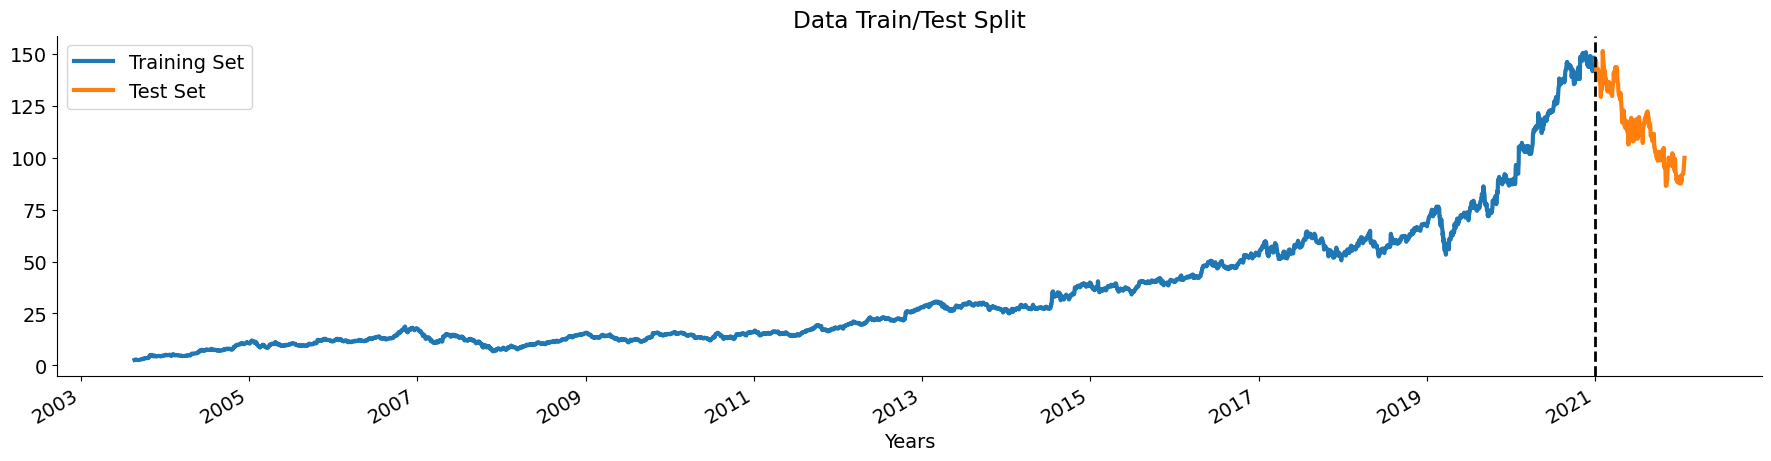

In [30]:

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2022-01-01', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [31]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 4374 rows in the training set and 266 rows in the test set


In [32]:
exogenous_features = ['Open', 'High', 'Low']
train = train[train.columns[:4]]
test = test[test.columns[:4]]

In [33]:
test.tail()

,Open,High,Low,Close
Date,,,,
2023-01-18 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001
2023-01-19 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003
2023-01-20 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003
2023-01-23 00:00:00-05:00,95.099998,98.300003,95.019997,98.019997
2023-01-24 00:00:00-05:00,97.949997,100.040001,97.500000,99.790001


In [34]:
train = train.dropna()
# df.isnull().sum()

In [35]:
import warnings 
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4373
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -147.426
Date:                Sun, 29 Jan 2023   AIC                            306.852
Time:                        17:00:09   BIC                            345.150
Sample:                             0   HQIC                           320.366
                               - 4373                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5328      0.005    -97.269      0.000      -0.544      -0.522
High           0.7528      0.004    191.685      0.000       0.745       0.761
Low            0.7808      0.004    199.459      0.000       0.773       0.789
ar.L1         -0.1289      0.005    -24.913      0.000      -0.139      -0.119
ma.L1         -0.9999      0.003   -336.327      0.000      -1.006      -0.994
sigma2         0.0625      0.000    130.503      0.000       0.062       0.063
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             45443.67
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              25.20   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now that the model is trained let's go ahead and make the predictions on the training data and later the test data

In [36]:
train['Predictions'] = model_fit.predict()

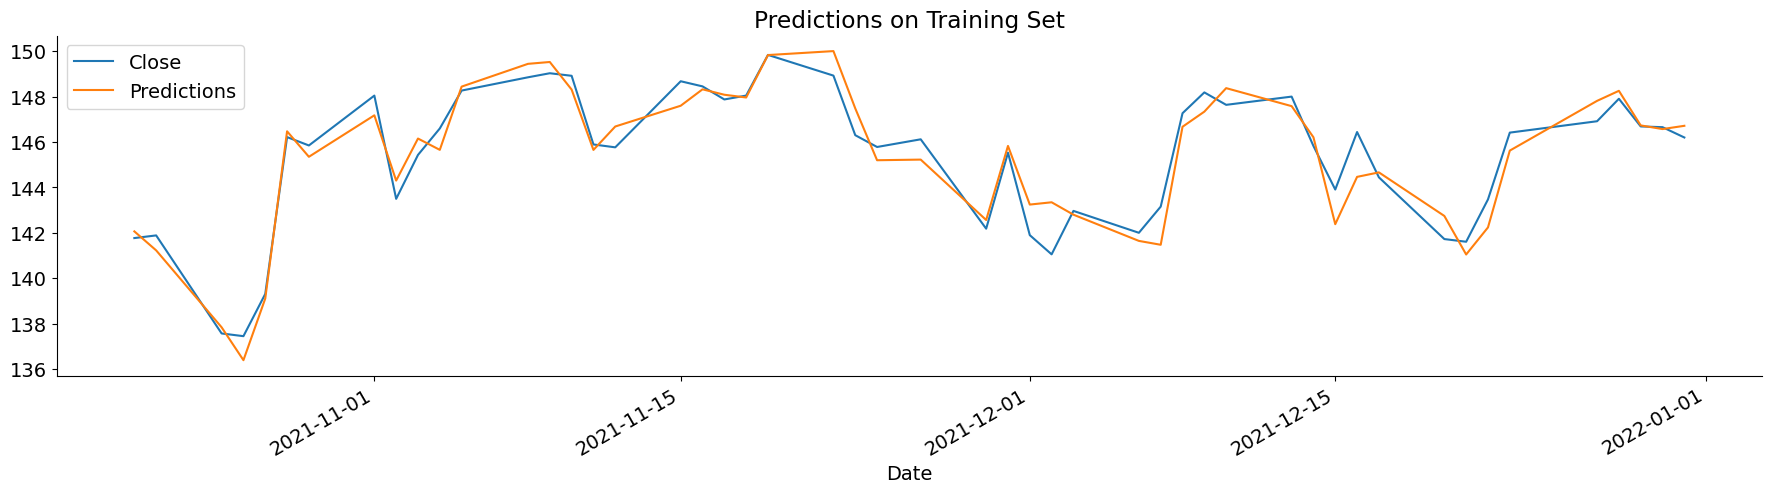

In [37]:
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [38]:
test[exogenous_features].iloc[-1]

Open     97.949997
High    100.040001
Low      97.500000
Name: 2023-01-24 00:00:00-05:00, dtype: float64

In [39]:
# # This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
# data2 = yf.Ticker("GOOGL")
# #create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
# data_fut = data2.history(period="max")

In [40]:
# train1 = data_fut[data_fut.index.year<2022]
# test1 = data_fut[data_fut.index.year>=2022]

In [41]:
# exogenous_features = ['Open', 'High', 'Low']
# train1 = train1[train.columns[:4]]
# test1 = test1[test.columns[:4]]

In [42]:
# #Making Predictions on Test Set
# forecast1 = [model_fit.forecast(exog=test1[exogenous_features].iloc[i]).values[0] for i in range(len(test1))]
# test1['Forecast'] = forecast1

In [43]:
# test1[['Close','Forecast']][-50:].plot()
# plt.title('Predictions on Test Set')
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.show()

In [44]:
#Making Predictions on Test Set
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]
test['Forecast'] = forecast

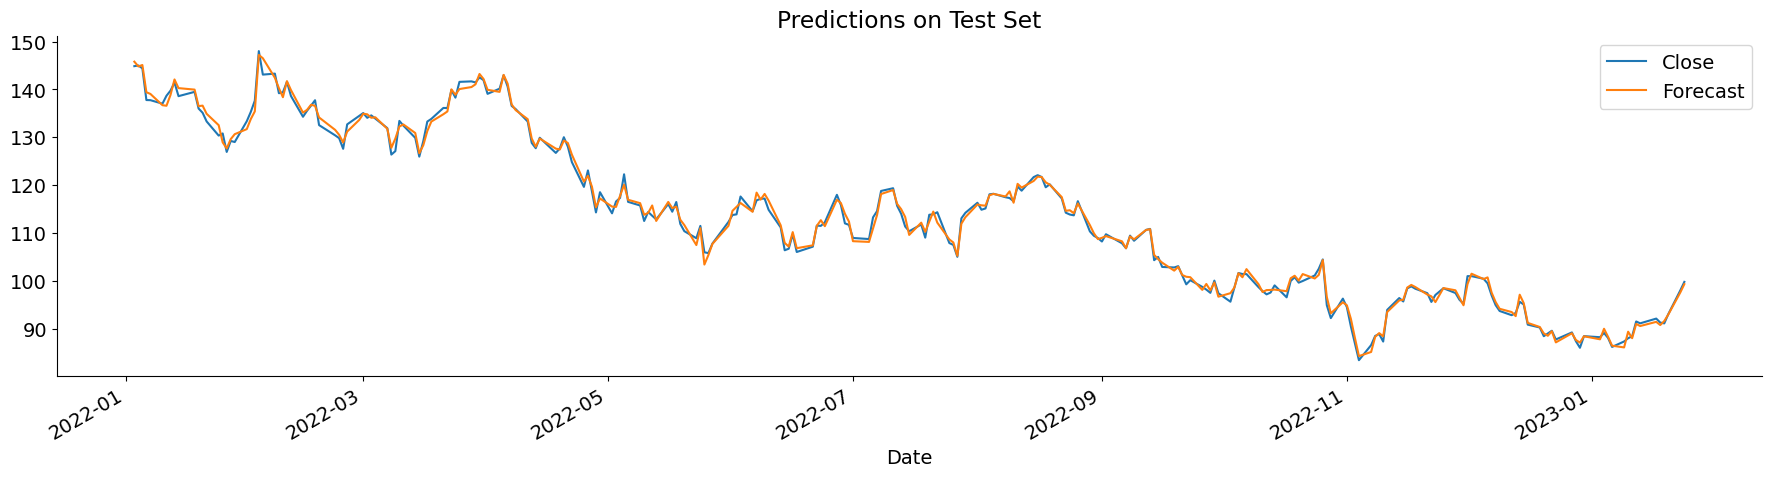

In [45]:
test[['Close','Forecast']].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.9742


In [47]:
test

,Open,High,Low,Close,Forecast
Date,,,,,
2022-01-03 00:00:00-05:00,146.050003,146.698502,144.852005,144.852005,145.791859
2022-01-04 00:00:00-05:00,145.054993,145.850998,143.712997,144.991501,144.794598
2022-01-05 00:00:00-05:00,145.395996,146.485001,143.716507,144.399506,145.092946
2022-01-06 00:00:00-05:00,144.419998,144.499496,137.688004,137.774994,139.410991
2022-01-07 00:00:00-05:00,136.998505,139.940002,136.558502,137.747498,139.050615
...,...,...,...,...,...
2023-01-18 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,90.776033
2023-01-19 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,91.608147
2023-01-20 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003,92.966664


In [48]:
# This code creates a variable called 'data' and assigns it to the yfinance Ticker object for Google
data2 = yf.Ticker("GOOGL")
#create a variable called 'data_hist' and assigns it to the history method of the Google Ticker object, set to the 'max' period
data_fut = data2.history(period="max")

In [49]:
data_fut = data_fut.drop(data_fut.index[:4613])

In [50]:
data_fut.to_csv('fut.csv')

In [51]:
fut = pd.read_csv('/content/fut.csv')
fut

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-12-14 00:00:00-05:00,95.199997,96.870003,93.599998,95.070000,28733600,0.0,0.0
1,2022-12-15 00:00:00-05:00,93.129997,93.639999,90.010002,90.860001,40107000,0.0,0.0
2,2022-12-16 00:00:00-05:00,90.760002,91.330002,89.519997,90.260002,58011800,0.0,0.0
3,2022-12-19 00:00:00-05:00,90.260002,90.559998,88.209999,88.440002,29493000,0.0,0.0
4,2022-12-20 00:00:00-05:00,88.110001,89.180000,87.440002,89.019997,23453800,0.0,0.0
5,2022-12-21 00:00:00-05:00,89.080002,90.220001,88.320000,89.580002,24745600,0.0,0.0
6,2022-12-22 00:00:00-05:00,88.160004,88.540001,86.320000,87.760002,27658300,0.0,0.0
7,2022-12-23 00:00:00-05:00,87.110001,89.550003,87.070000,89.230003,23003000,0.0,0.0
8,2022-12-27 00:00:00-05:00,88.800003,88.940002,87.010002,87.389999,20097300,0.0,0.0
9,2022-12-28 00:00:00-05:00,86.980003,88.040001,85.940002,86.019997,19523200,0.0,0.0


In [52]:
fut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          30 non-null     object 
 1   Open          30 non-null     float64
 2   High          30 non-null     float64
 3   Low           30 non-null     float64
 4   Close         30 non-null     float64
 5   Volume        30 non-null     int64  
 6   Dividends     30 non-null     float64
 7   Stock Splits  30 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ KB


In [53]:
#Making Predictions for future
forecast_fut = [model_fit.forecast(exog=fut[exogenous_features].iloc[i]).values[0] for i in range(len(fut))]
fut['Forecast_fut'] = forecast_fut

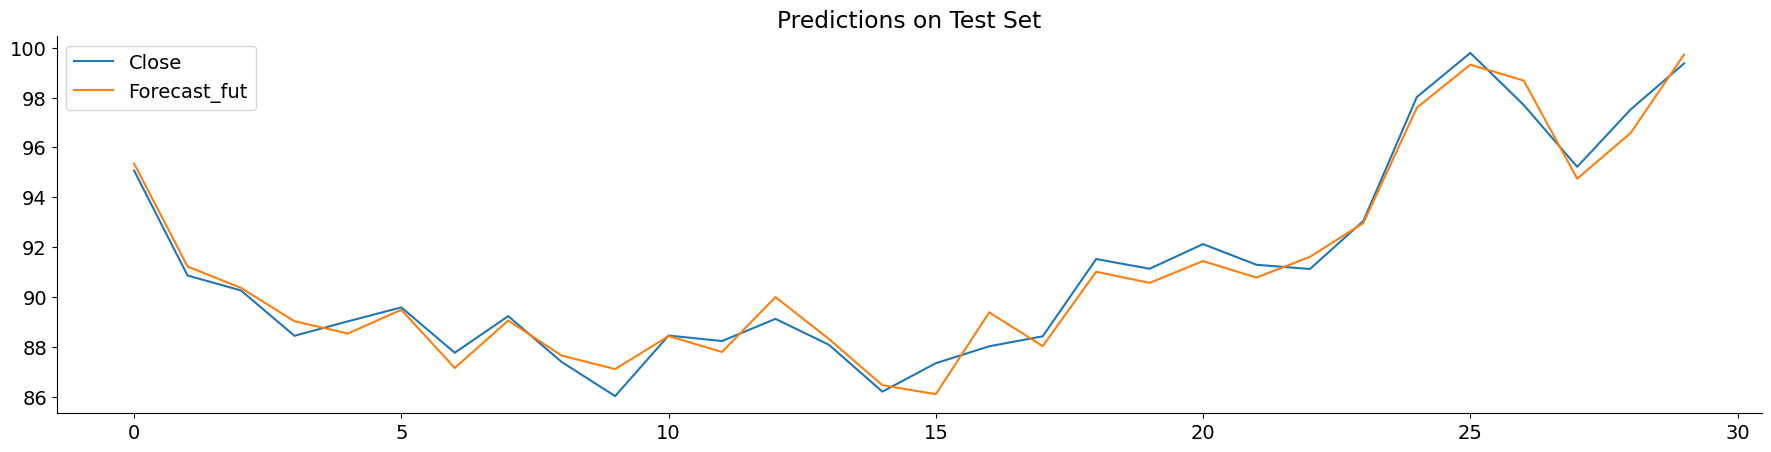

In [54]:
fut[['Close','Forecast_fut']].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()